## CS 105 Project
## Team 18: FOREST FOREST FIRE "FIRE is Hot"

## Members:
### Godfrey Lozada, Ian Lopez, Tri Tran, Rovin Soriano, Howie Nguyen


Introduction:

    Our dataset was found through data.gov. This dataset contains information on fires in the state of Oregon from 2000 to 2022. It includes 38 bits of information on these fires. However we only used 14 features (Serial, FireYear, Area, Size_class, EstTotalAcres, HumanOrLightning, CauseBy, GeneralCause, Lat_DD, Long_DD, FO_LandOwnType, County, Ign_DateTime, Discover_DateTime). Some of these features are categorical and some are numerical.
    
    Legend:
        - Serial: It is the serial number of the Fire, it is use for its unique indentication
        - FireYear: The year that the fire started
        - Area: The area of Oregon that the fire started (NOA, SOA, EOA)
        - Size_class: A classification of the fire based on how many acres were burnt (Numerical key provided further in the notebook)
        - EstTotalAcres: The total amount of acres burned due to the fire
        - HumanOrLightning: If the fire was started by humans or by lightning
        - CauseBy: If human, this is the group that that person belonged to. If the cause was lightning, then it's just lightning.
        - GeneralCause: The general cause of how the fire started.
        - Lat_DD: Latitude coordinate of where the fire started.
        - Long_DD: Longitude coordinate of where the fire started.
        - FO_LandOwnType: The type of property where the fire started.
        - County: The county in Oregon where the fire started.
        - Ign_DateTime: The time at which a fire was ignited.
        - Discover_DateTime: The time at which a fire was discovered by ODF (Oregon Department of Forestry).

Description:

    The purpose of this project is to examine the relationship between fires and their aspects (like county, cause, amount burned, location) to determine correlation. Then, we will predict the class size of a fire by the features: CauseBy, FO_LandOwnType, and County. We will predict this using machine techniques discussed during lecture such as K-means clustering and K-fold validation. Additionally, we will use logistic regression to predict the chance of a major fire event by these features: General Cause, County, and FO_LandOwnType (major fire event is classified as any fire that burns more than 500 acres of land before containment).
    
    *note when doing kmeans we added the parameter random_state = 0  "kmeans = KMeans(n_clusters=3, random_state=0)" the parameter random_state that sets the random seed for the initialization of the centroids, therefore the graphs from clusterings that will be here might be different looking from the slides and the report.
    

In [157]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('FireOccurence.csv')
df.head()

,Serial,FireYear,Area,Size_class,EstTotalAcres,HumanOrLightning,CauseBy,GeneralCause,Lat_DD,Long_DD,FO_LandOwnType,County,Ign_DateTime,Discover_DateTime
0,58256,2000,EOA,B,0.75,Lightning,Lightning,Lightning,44.91519,-119.28863,BLM,Grant,7/18/2000 19:00,7/19/2000 13:15
1,59312,2000,EOA,C,80.00,Lightning,Lightning,Lightning,45.08509,-118.33440,Other Private,Union,8/24/2000 5:30,8/24/2000 13:07
2,61657,2001,SOA,A,0.10,Human,Motorist,Smoking,42.53671,-123.21215,BLM,Jackson,8/10/2001 17:40,8/10/2001 17:45
3,63735,2002,NOA,A,0.01,Human,Motorist,Recreation,44.58709,-123.42779,State,Benton,7/6/2002 13:01,7/6/2002 13:02
4,68019,2003,NOA,A,0.01,Lightning,Lightning,Lightning,44.74026,-123.49811,Industrial,Polk,8/22/2003 4:00,8/22/2003 5:00


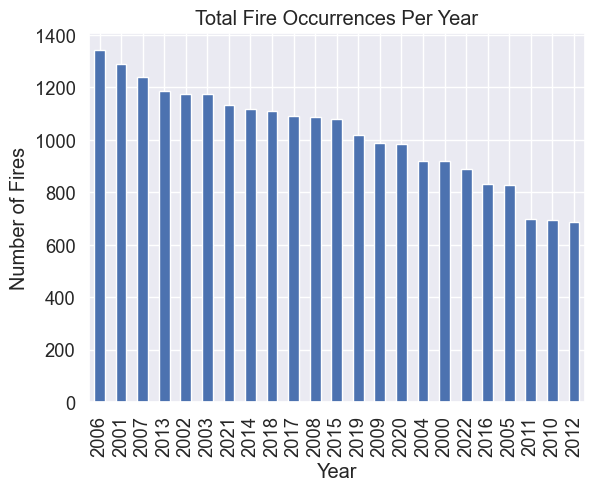

2006    1342
2001    1289
2007    1239
2013    1186
2002    1175
2003    1174
2021    1134
2014    1119
2018    1112
2017    1090
2008    1088
2015    1079
2019    1020
2009     990
2020     983
2004     921
2000     921
2022     888
2016     832
2005     827
2011     699
2010     693
2012     689
Name: FireYear, dtype: int64


In [158]:
df['FireYear'] = pd.to_datetime(df['FireYear'], format='%Y').dt.year
fire_counts = df['FireYear'].value_counts()
fire_counts.plot(kind='bar', rot=0)
plt.title('Total Fire Occurrences Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=90)
plt.show()
print(fire_counts)

**YOUR EXPLANATION HERE**
This bar chart depicts the frequency of forest fire incidents that occurred annually from 2006 to 2012, aiming to examine the trend over time. From the chart, it is noticeable that there has been a gradual decline in the number of forest fires every year since 2006.

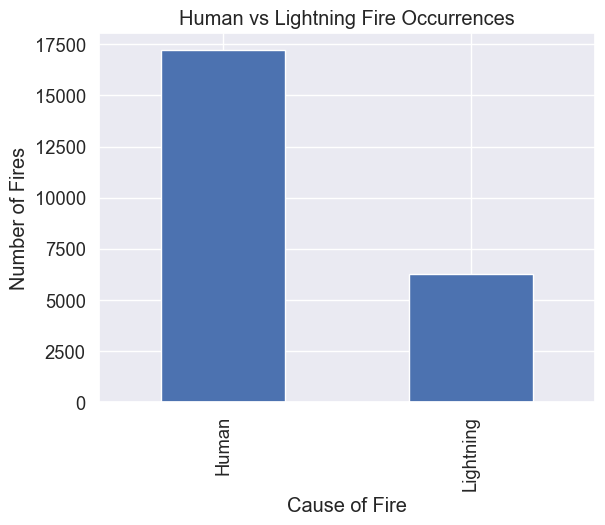

In [159]:
df = df[df['HumanOrLightning'] != 'Under Invest']
humanlightning_counts = df['HumanOrLightning'].value_counts()
humanlightning_counts.plot(kind='bar')
plt.title('Human vs Lightning Fire Occurrences')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Fires')
plt.show()

This visualization aims to compare the incidence of forest fires caused by human activities versus natural causes, specifically, lightning.
From the chart, it is evident that the number of forest fires caused by human activities is over three times higher than those caused by lightning strikes.

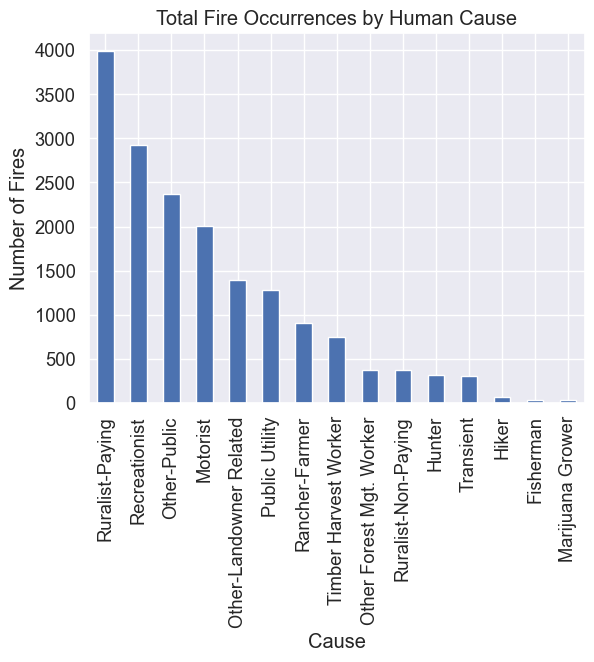

In [160]:
df = df[df['CauseBy'] != 'Lightning']
causeBy = df['CauseBy'].value_counts()
causeBy.plot(kind='bar')
plt.title('Total Fire Occurrences by Human Cause')
plt.xlabel('Cause')
plt.ylabel('Number of Fires')
plt.show()

This visualization aims to analyze forest fires caused by all human activities. 
From the chart, it is evident that the category of Ruralist-Paying is responsible for the highest number of forest fires, with approximately 4000 incidents. 
On the other hand, the category of Marijuana Grower has the lowest number of forest fires, with less than 100 incidents recorded

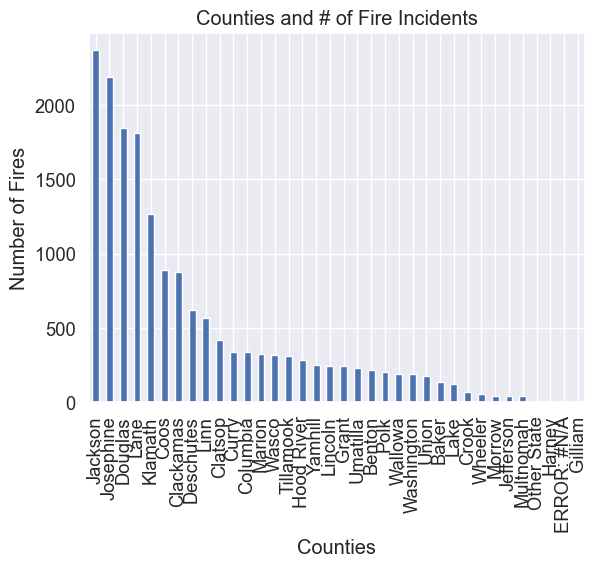

In [161]:
county = df['County'].value_counts()
county.plot(kind='bar')
plt.title('Counties and # of Fire Incidents')
plt.xlabel('Counties')
plt.ylabel('Number of Fires')
plt.show()

This visualization aims to investigate the number of forest fire incidents in each county of Oregon. 
From the chart, it is apparent that Jackson county has the highest number of fire incidents, with approximately 2400 incidents. 
In contrast, Harney county and Gilliam county, along with some other counties, have the lowest number of forest fires, all with less than ten recorded incidents.

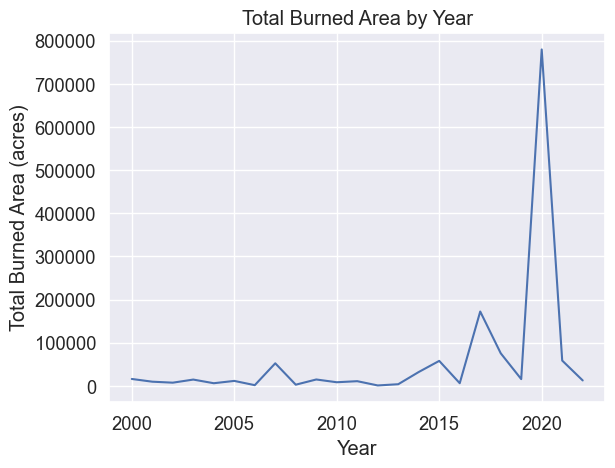

In [162]:
fires_by_year = df.groupby('FireYear')['EstTotalAcres'].sum()
fires_by_year.plot(kind='line')
plt.title('Total Burned Area by Year')
plt.xlabel('Year')
plt.ylabel('Total Burned Area (acres)')
plt.show()

This line chart depicts the trend of the total burned area in acres resulting from fire incidents from 2000 to 2021. From the chart, it is evident that there is a consistent correlation in the total burned area from 2000 to 2015, except for a slight increase in burned area in 2006 and 2007 to about 70,000 acres, while the rest of the years recorded burned areas under 40,000 acres.
However, from 2016 to 2017, there was a significant surge in burned area to approximately 180,000 acres. In 2020, there was a sharp increase in burned area to about 780,000 acres, indicating a notable deviation from the previous trend.

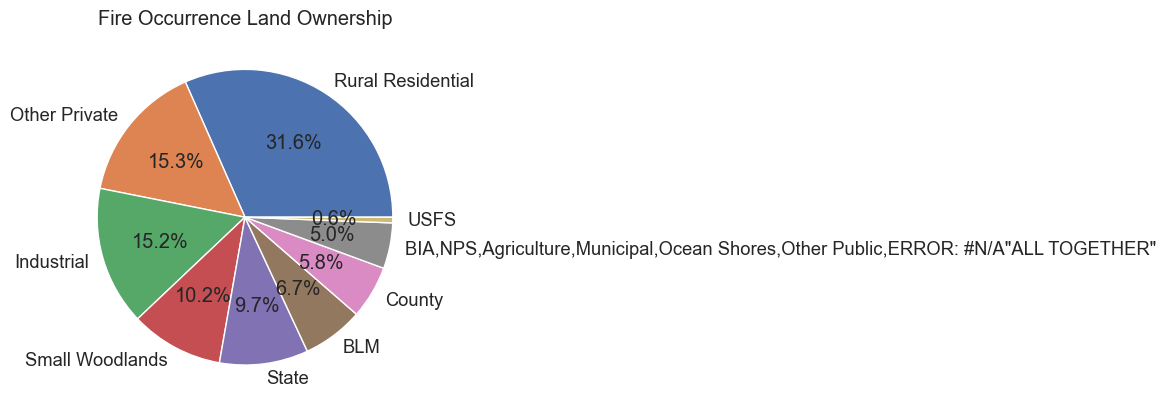

In [163]:
# merged stuff so it looks cleaner
df['FO_LandOwnType_Merged'] = df['FO_LandOwnType'].replace(['BIA', 'NPS', 'Agriculture','Municipal','Ocean Shores','Other Public','ERROR: #N/A'], 'BIA,NPS,Agriculture,Municipal,Ocean Shores,Other Public,ERROR: #N/A"ALL TOGETHER"')
counts = df['FO_LandOwnType_Merged'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Fire Occurrence Land Ownership')
plt.show()
#combined the rest except for the USFS BECAUSE it looks cleaner and USFS have lots of burns

This pie chart aims to examine the land ownership distribution of all forest fire occurrences in Oregon State. 
From the chart, it is apparent that Rural Residential lands account for the highest percentage of fire incidents, representing 31.6% of the total. 
Conversely, USFS (United States Forest Service) lands have the lowest percentage of fire incidents, with only 0.6% recorded.

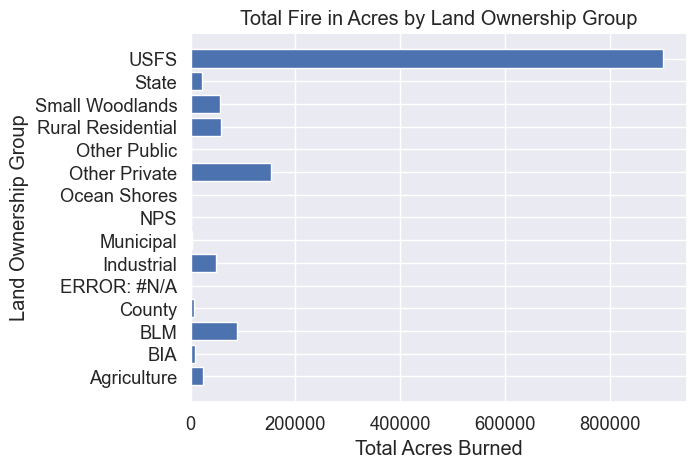

In [164]:
#using the merged one doesnt make sense since the one of the lowest USFS have da highest GOOD FINDDDD!! 
# grouped = df.groupby('FO_LandOwnType')['EstTotalAcres'].sum()
# plt.bar(grouped.index, grouped.values)
# plt.title('Total Fire in Acres by Land Ownership Group')
# plt.xlabel('Land Ownership Group')
# plt.ylabel('Total Acres Burned')
# plt.xticks(rotation=90)
# plt.show()
##Changing up x and y corrdinate to make it looks different atleast
grouped = df.groupby('FO_LandOwnType')['EstTotalAcres'].sum()
plt.barh(grouped.index, grouped.values)
plt.title('Total Fire in Acres by Land Ownership Group')
plt.xlabel('Total Acres Burned')
plt.ylabel('Land Ownership Group')
plt.show()

This visualization aims to analyze the total area burned by forest fires in different land ownership groups. 
From the chart, it is evident that USFS (United States Forest Service) lands have the highest total burned area, with approximately 860,000 acres. 
In contrast, Other Public lands, Ocean Shores, and NPS (National Park Service) lands recorded no burned areas in acres.

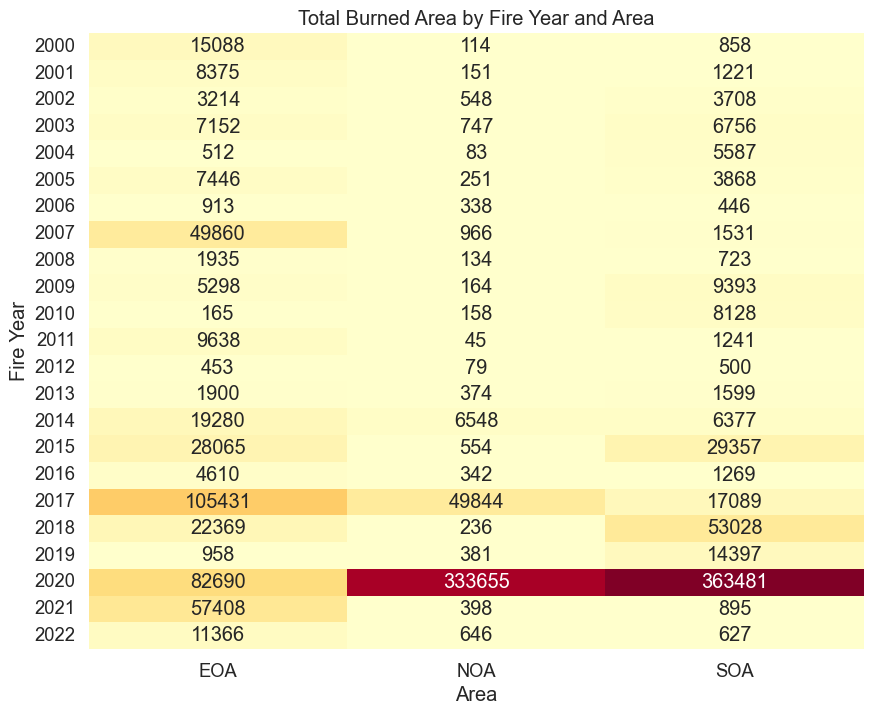

In [165]:
pt = pd.pivot_table(df, values='EstTotalAcres', index='FireYear', columns='Area', aggfunc='sum')
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(pt, cmap='YlOrRd', annot=True, fmt='.0f', cbar=False)
plt.title('Total Burned Area by Fire Year and Area')
plt.xlabel('Area')
plt.ylabel('Fire Year')
plt.show()

This heatmap indicates the total area that was burned according to the year and ODF(Oregon Department of Forestry) Fire Protection Area.
The Y-axis concerns the year.
The X-axis concerns ODF(Oregon Department of Forestry) Fire Protection Area in which we have three areas: Eastern Oregon Area(EOA), Northern Oregon Area(NOA), and Southern Oregon Area(SOA).
The lighter the shade the less area burned while a darker shade indicates more area burned. According to the heatmap, in 2020, each region suffered higher areas burnt, considerably more in NOA (333655) and SOA (363481) than in EOA (82690).
Each area in each year suffered relatively less area burnt than 2020 with the exception of EOA in 2017. However, it is worth noting that spikes in area burnt is increasingly more common in later years (2014 and above).
Note: COVID-19 might have influenced the 2020 statistics.

In [166]:


df["Ign_DateTime"] = pd.to_datetime(df["Ign_DateTime"])
df["Discover_DateTime"] = pd.to_datetime(df["Discover_DateTime"])
#Needed to do in seconds beceause if just hours fire less than an hour just output 0.0
df["Diff_Hours"] = (df["Discover_DateTime"] - df["Ign_DateTime"]).dt.total_seconds() / 3600
print(df["Diff_Hours"].iloc[:5]) # SOLID OUTPUT!!! 

max_diff= df["Diff_Hours"].max()
print(max_diff)

max_rows = df[df["Diff_Hours"] == max_diff]
print(max_rows)

mean_diff=df["Diff_Hours"].mean()
print("average difference " + str(mean_diff)) 
## did the math for the first one and its is right 18 hours and 15 mins which is 18.25
## 1988-09-23 18:30:00 ignition time and was discovered in 2008 you gotta be fucking kidding me LOL :)
## fire is small too, this part of the data does not make sense honestly
#df.head(5) #Why does it start with row 2 when printing weird weird 

2    0.083333
3    0.016667
6    0.166667
7    0.083333
8    0.333333
Name: Diff_Hours, dtype: float64
175320.75
      Serial  FireYear Area Size_class  EstTotalAcres HumanOrLightning  \
6549   82973      2008  NOA          A           0.01            Human   

     CauseBy GeneralCause  Lat_DD    Long_DD FO_LandOwnType   County  \
6549  Hunter      Smoking   45.17 -123.56056     Industrial  Yamhill   

            Ign_DateTime   Discover_DateTime FO_LandOwnType_Merged  Diff_Hours  
6549 1988-09-23 18:30:00 2008-09-23 19:15:00            Industrial   175320.75  
average difference 98.89293176909955


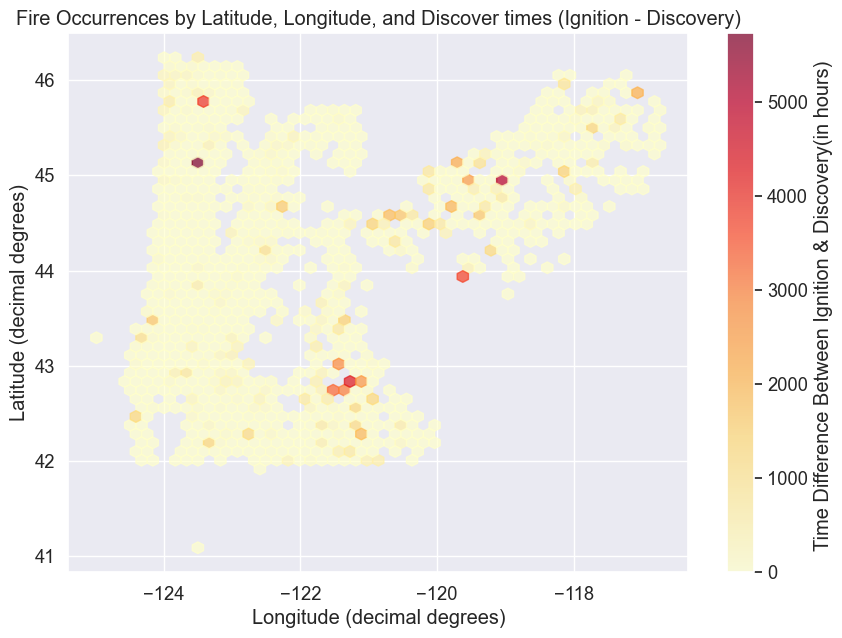

In [167]:
plt.figure(figsize=(10, 7)) #just adust the size you want
plt.hexbin(df['Long_DD'], df['Lat_DD'], C=df['Diff_Hours'], gridsize=50, cmap='YlOrRd', alpha=0.7)
plt.title('Fire Occurrences by Latitude, Longitude, and Discover times (Ignition - Discovery)')
plt.xlabel('Longitude (decimal degrees)')
plt.ylabel('Latitude (decimal degrees)')
cb = plt.colorbar()
cb.set_label('Time Difference Between Ignition & Discovery(in hours) ')
plt.show()

This heatmap describes the discovery times of a fire according to their location (latitude and longitude).
The X-axis concerns the Longitude.
The Y-axis concertns the Latitude.
The heatmap colorization concerns the discovery times of a fire (the difference between the time of ignition and the time of discovery), or in other words, how long it took for a fire to be discovered after it started.
A lighter shade indicates a relatively low discovery time while the darker the shade, the higher the discovery time.
According to the heatmap, the fires in the Central Southern and Central part of Oregon have higher discovery times.
Additionally, there are some extreme discovery times in the Northwestern part of Oregon.

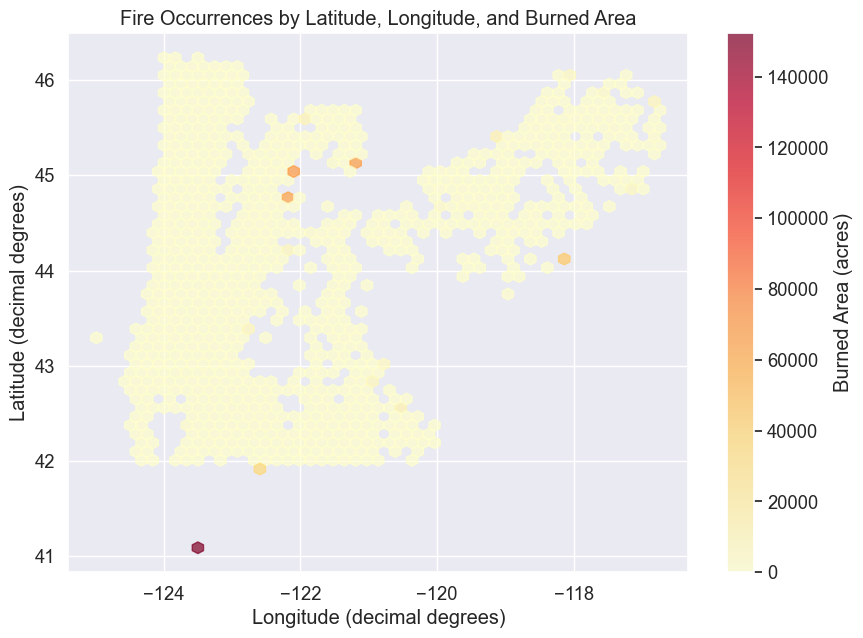

In [168]:
plt.figure(figsize=(10, 7)) #just adust the size you want
plt.hexbin(df['Long_DD'], df['Lat_DD'], C=df['EstTotalAcres'], gridsize=50, cmap='YlOrRd', alpha=0.7)
plt.title('Fire Occurrences by Latitude, Longitude, and Burned Area')
plt.xlabel('Longitude (decimal degrees)')
plt.ylabel('Latitude (decimal degrees)')
cb = plt.colorbar()
cb.set_label('Burned Area (acres)')
plt.show()

This heatmap describes the area burnt by a fire according to their location (latitude and longitude).
The X-axis concerns the Longitude.
The Y-axis concertns the Latitude.
The heatmap colorization concerns the area burnt (in acres).
A lighter shade indicates a relatively low area burnt while darker shades indicate higher area burnt.
According to the graphs, an overwhelming majority of fires in Oregon burn less than 20000 acres.
However, in the Northern part of Oregon, fires have a tendency to burn between 60000 and 80000 acres.

# Regression Analysis
## Splitting fire origin points into distinct clusters

<p> Now we use this data to create a model in order for us to predict the severity of fires. For this model, we will be using:</p>

### Independent
- CauseBy: The general description of the cause of the fire
- FO_LandOwnType: The type of land that the fire has started on
- County: The County that the fire originiated from

### Trying to find: Size_class
<p> The data has already binned the fires into respective size classes. The key is as seen below: </p>

- Class A - one-fourth acre or less;
- Class B - more than one-fourth acre, but less than 10 acres;
- Class C - 10 acres or more, but less than 100 acres;
- Class D - 100 acres or more, but less than 300 acres;
- Class E - 300 acres or more, but less than 1,000 acres;
- Class F - 1,000 acres or more, but less than 5,000 acres;
- Class G - 5,000 acres or more.

<p> Given that the data is all categorical, we must convert these classifications into numbers for our model to process. Additionally, we must purge all fires with a values of 0 acres, since that would imply that there was no fire to begin with. <p>


In [268]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn import tree
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('FireOccurence.csv')

# Sort values by serial number
df.sort_values(by=['Serial'])

# If no serial number means fire was small and we can leave out
df.dropna(inplace=True)

# Why would we track a fire if 0 acres were burnt?
df = df[df.EstTotalAcres != 0]

# Assign var
x = df['Long_DD']
y = df['Lat_DD']

# Log values for regression models later
df['EstTotalAcres'].loc[~(df==0).all(axis=1)]
df["log(acres)"] = np.log(df["EstTotalAcres"].abs())

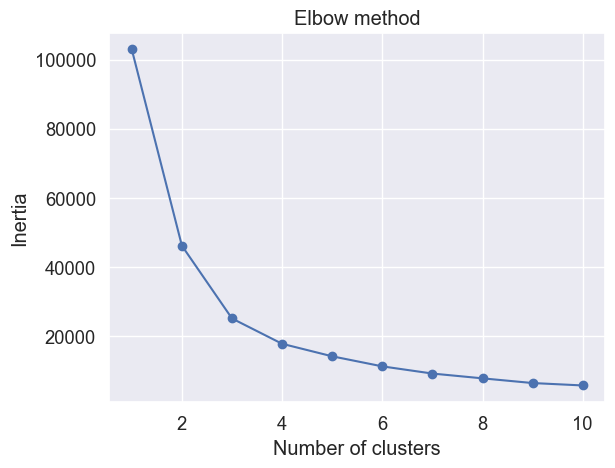

In [269]:
# COde to find our elbow for the k-means clustering method
from sklearn.cluster import KMeans

# Create data var
data = list(zip(x, y))
inertias = []

# Test cluster sizes 1-11
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
# Plot with k as x-var, inertia as y var
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


<p> After running the code, we find that 3 clusters would be the most optimal group number to have for our testing. We have the data fir a KMeans model, and have our first look at what individual clusters of coordinates we can evaluate. </p>

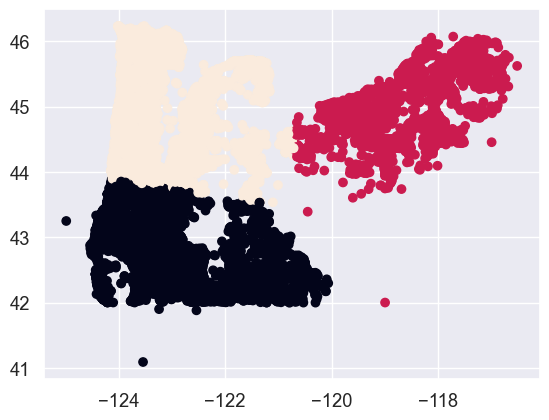

In [270]:
# Execute k-mean cluster and create graph
kmeans = KMeans(n_clusters=3, random_state=0) # THIS PART IS WHAT THE NOTES IS ABOUT FROM ABOVE
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

After viewing this, it would seem that Oregon will be split up into Northeast, Northwest, and Southwest regions for our decision tree model.

In [271]:
# Create dataframes for individual clusters
cluster1 = df[kmeans.labels_==0]
cluster2 = df[kmeans.labels_==1]
cluster3 = df[kmeans.labels_==2]

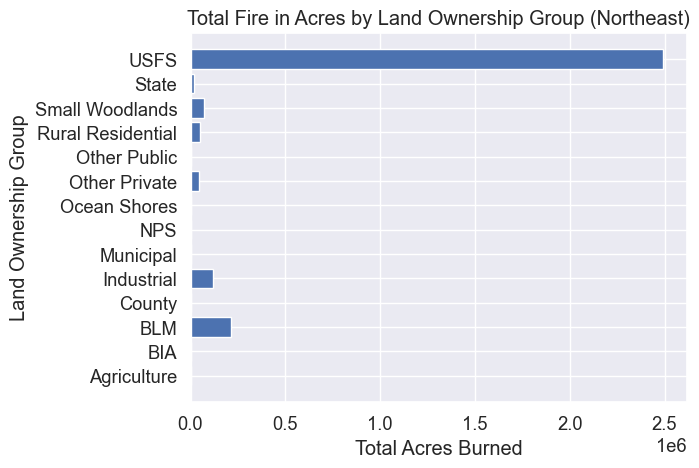

In [272]:
grouped1 = cluster1.groupby('FO_LandOwnType')['EstTotalAcres'].sum()
plt.barh(grouped1.index, grouped1.values)
plt.title('Total Fire in Acres by Land Ownership Group (Northeast)')
plt.xlabel('Total Acres Burned')
plt.ylabel('Land Ownership Group')
plt.show()

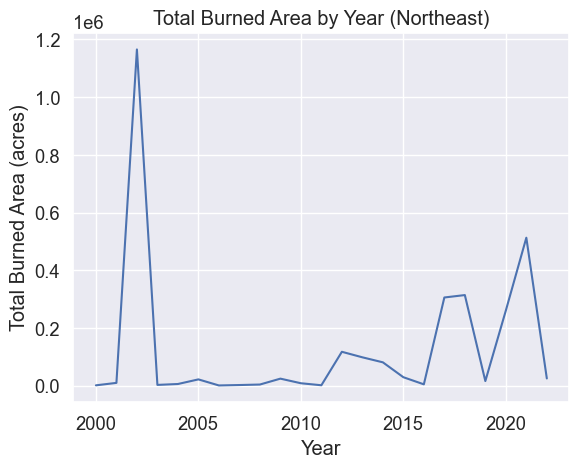

In [273]:
fires_by_year1 = cluster1.groupby('FireYear')['EstTotalAcres'].sum()
fires_by_year1.plot(kind='line')
plt.title('Total Burned Area by Year (Northeast)')
plt.xlabel('Year')
plt.ylabel('Total Burned Area (acres)')
plt.show()

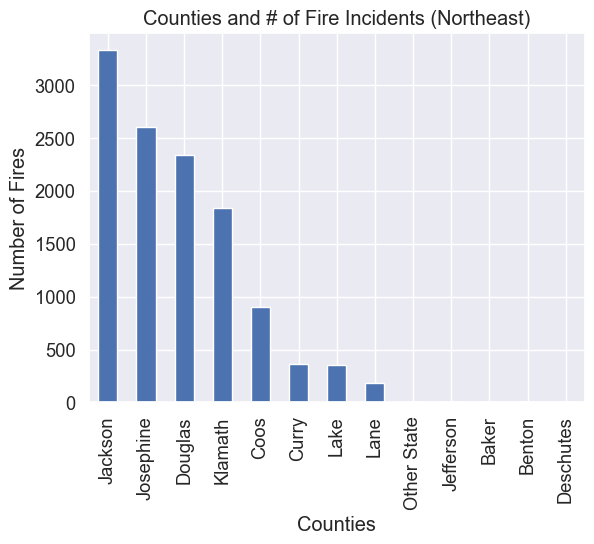

In [274]:
county1 = cluster1['County'].value_counts()
county1.plot(kind='bar')
plt.title('Counties and # of Fire Incidents (Northeast)')
plt.xlabel('Counties')
plt.ylabel('Number of Fires')
plt.show()

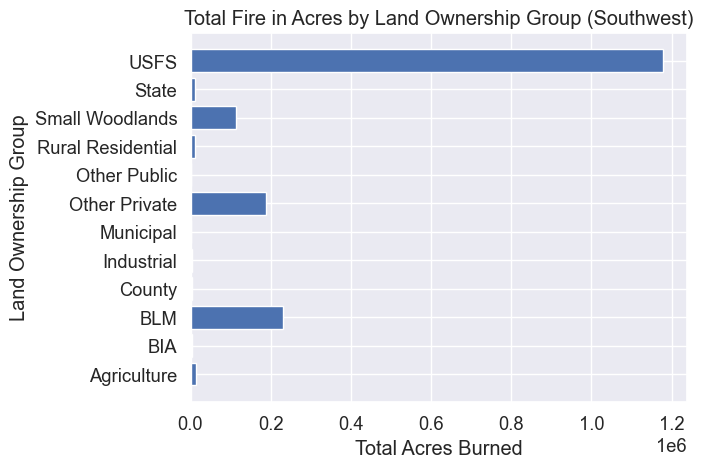

In [275]:
grouped2 = cluster2.groupby('FO_LandOwnType')['EstTotalAcres'].sum()
plt.barh(grouped2.index, grouped2.values)
plt.title('Total Fire in Acres by Land Ownership Group (Southwest)')
plt.xlabel('Total Acres Burned')
plt.ylabel('Land Ownership Group')
plt.show()

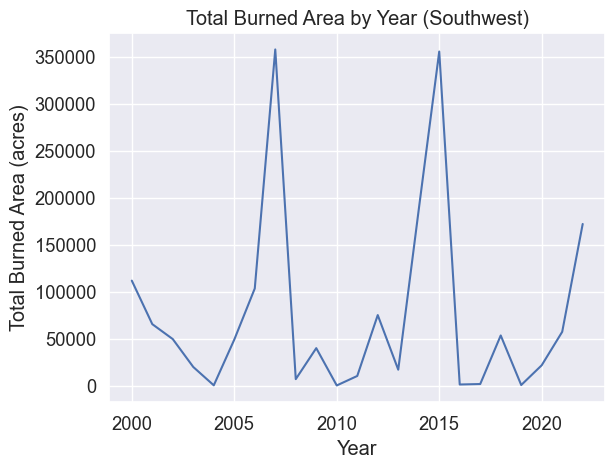

In [276]:
fires_by_year2 = cluster2.groupby('FireYear')['EstTotalAcres'].sum()
fires_by_year2.plot(kind='line')
plt.title('Total Burned Area by Year (Southwest)')
plt.xlabel('Year')
plt.ylabel('Total Burned Area (acres)')
plt.show()

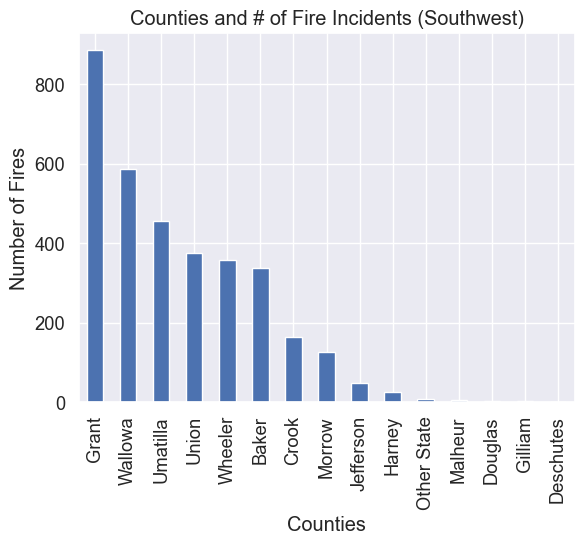

In [277]:
county2 = cluster2['County'].value_counts()
county2.plot(kind='bar')
plt.title('Counties and # of Fire Incidents (Southwest)')
plt.xlabel('Counties')
plt.ylabel('Number of Fires')
plt.show()

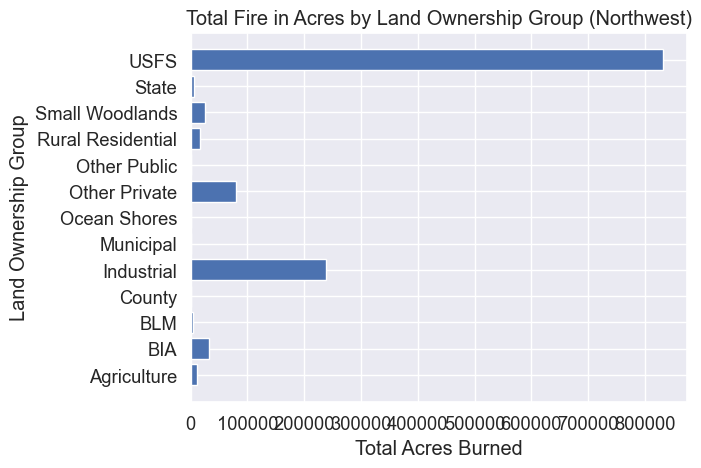

In [278]:
grouped3 = cluster3.groupby('FO_LandOwnType')['EstTotalAcres'].sum()
plt.barh(grouped3.index, grouped3.values)
plt.title('Total Fire in Acres by Land Ownership Group (Northwest)')
plt.xlabel('Total Acres Burned')
plt.ylabel('Land Ownership Group')
plt.show()

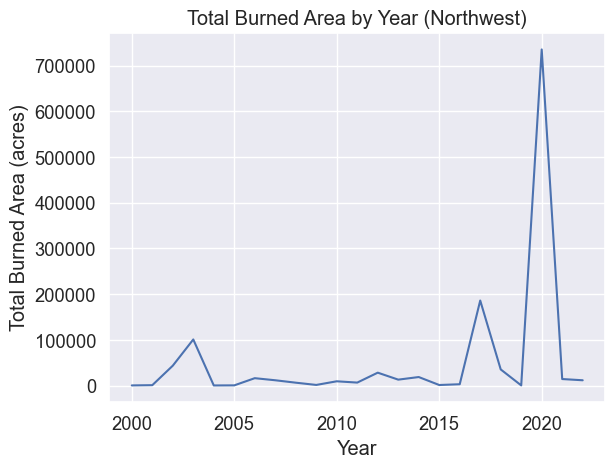

In [279]:
fires_by_year3 = cluster3.groupby('FireYear')['EstTotalAcres'].sum()
fires_by_year3.plot(kind='line')
plt.title('Total Burned Area by Year (Northwest)')
plt.xlabel('Year')
plt.ylabel('Total Burned Area (acres)')
plt.show()

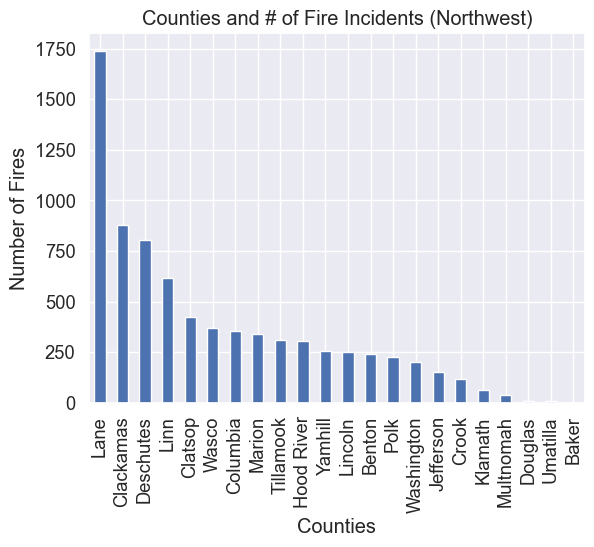

In [280]:
county3 = cluster3['County'].value_counts()
county3.plot(kind='bar')
plt.title('Counties and # of Fire Incidents (Northwest)')
plt.xlabel('Counties')
plt.ylabel('Number of Fires')
plt.show()

# Examining Major Fire Events in Oregon
## Using Logistic Regression
<p> Using the data provided by the Oregon Department of Forestry regarding wildfire events, we want to be able to predict the chance of a major fire event. A major fire event is described as any fire that burns more than 500 acres of land before being contained. <\p>
    
<p> We will use a logistic regression for this first task, taking in <b> General Cause, County, and Land Type </b> as inputs and calculating their possible correlation with major fire events. 

In [281]:
# Import required packages and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read in CSV file
df=pd.read_csv('FireOccurence.csv')

# Categorize/Bin major fire events (500+ acres burnt)
df.loc[df['EstTotalAcres'].between(0, 100, 'both'), 'major'] = '0'
df.loc[df['EstTotalAcres'].between(1000, float("inf"), 'right'), 'major'] = '1'

# Dummy all variables being used, rows that have a certain event will have a "1" under respective column
major_fire = pd.get_dummies(df['major'], drop_first=True)
cause = pd.get_dummies(df['GeneralCause'], drop_first=True)
county = pd.get_dummies(df['County'], drop_first=True)
land = pd.get_dummies(df['FO_LandOwnType'], drop_first=True)

# Drop original classification
df.drop(['major', 'GeneralCause', 'County', 'FO_LandOwnType'], axis = 1, inplace = True)

# Swap in new classification
df = pd.concat([major_fire, cause, county,land])
df.head()

,1,Debris Burning,Equipment Use,Juveniles,Lightning,Miscellaneous,Railroad,Recreation,Smoking,Under Invest,...,Industrial,Municipal,NPS,Ocean Shores,Other Private,Other Public,Rural Residential,Small Woodlands,State,USFS
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## K-Fold Cross Validation
<p> For this project, we will be using cross-validation to verify the accuracy and percision of our model. This first takes some data preparation. But as seen below We end up with an average score of ~0.74 for our logmodel and 10 splits. </p>

In [282]:
# For some reason fillna doesnt work for the whole thing so that sucks. Have to go with slow iterations :(
# This section takes a while so be patient please!!

for column in df:
    df[column] = df[column].fillna(0)
    
# Create two dataframes, one with outcomes (y) and one with input variables(x)
y = df.copy()
y = y.loc[:, ['1']]
x = df.drop(columns=['1'])

# Drop data that is not clear
x = x.drop(['ERROR: #N/A', 'Under Invest'], axis = 1)

y = y.apply(pd.to_numeric)

# Create Logistic Regression Model
logmodel = LogisticRegression(class_weight = 'balanced')

# RUn K-FOld
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
results = cross_val_score(logmodel, x, y.values.ravel(), cv=kfold)

# Get scores for K-Fold 
scores = cross_val_score(logmodel, x, y.values.ravel(), cv = kfold)
# Print Results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.73318433 0.74116645 0.73361005 0.74159217 0.73690932 0.73595147
 0.7345679  0.73839932 0.73584504 0.73148148]
Average CV Score:  0.736270753512133
Number of CV Scores used in Average:  10


## Analyzing our model
<p> It is worth looking into why our model got the score it has, as it seems that the score for every iteration of the 10-fold cross validation seems to be around ~0.74. We run a classification report on one of the validations and look into it further.</p>

### NOTE:
- 0.0: Minor Fire
- 1.0: Major Fire

In [283]:
# Split and create Prediction log 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logmodel.fit(x_train,y_train.values.ravel())
prediction_log = logmodel.predict(x_test)

# Print
print(classification_report(y_test,prediction_log))

              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     18751
         1.0       0.01      1.00      0.02        41

    accuracy                           0.74     18792
   macro avg       0.50      0.87      0.43     18792
weighted avg       1.00      0.74      0.85     18792



In [284]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, prediction_log)
confmtrx = np.array(matrix)
pd.DataFrame(confmtrx, index=['Minor','Major'],
columns=['Predicted_Minor', 'Predicted_Major', ])

,Predicted_Minor,Predicted_Major
Minor,13812,4939
Major,0,41


In [285]:
import math
coef_table = pd.DataFrame(list(x_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",logmodel.coef_.transpose())

coef_table['Coefs'] = np.exp(coef_table['Coefs'])
coef_table

,0,Coefs
0,Debris Burning,0.001050
1,Equipment Use,0.001000
2,Juveniles,0.006230
3,Lightning,0.000785
4,Miscellaneous,0.001869
5,Railroad,0.024315
6,Recreation,0.001496
7,Smoking,0.003709
8,Benton,0.013286
9,Clackamas,0.004417


In [286]:
print(logmodel.intercept_)

[1.29574564]


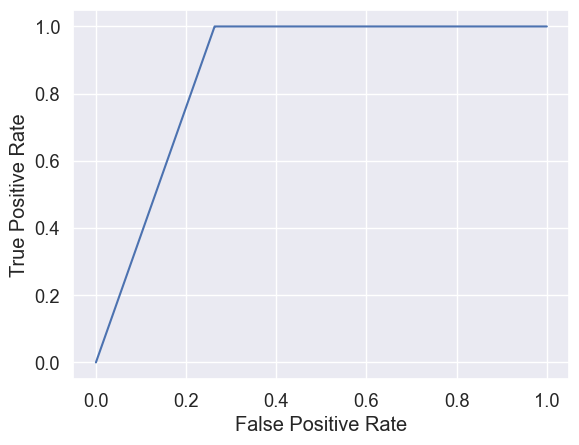

Plot-Area Under Curve: 0.8683803530478374


In [287]:
#define metrics
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("Plot-Area Under Curve: " + str(auc))

## Logistic Regression : Conclusion
<p> Looking at the results, our model was able to predict every major fire correctly but did comparativley poorly when it comes to the minor fires. However, in the context of major fire events this is not a bad outcome. Our recall was rather high; 1.0 even in this model. This means that it often overestimates the size of a fire, and rarely underestimates. It wouldn't be the worst thing for fire authorities to spend more resources to quickly dispatch a low-risk fire. However, coming unprepared to a high-risk fire can have major consequences. </p>

<p> Looking at the correlation coefficients and the intercept of the logarithmic model we can see why the model often overestimated the severity of a fire. With the intercept being so low and the coefficients being so high, each variable has a large impact on whether or not the model thinks there will be a major fire in the area. </p>

<p> Additionally, the Area under Curve (AUC) For our model is closer to 1 than 0.5. This means our model is actually good at classifying instances within the testing set.

# Analyzing Oregon at different regions
<p> Now, we will analyze Oregon as several distint regions that make up the state. To clearly identify the areas, we will use K-Means clustering to identify them.

In [288]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn import tree
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('FireOccurence.csv')

# Sort values by serial number
df.sort_values(by=['Serial'])

# If no serial number means fire was small and we can leave out
df.dropna(inplace=True)

# Why would we track a fire if 0 acres were burnt?
df = df[df.EstTotalAcres != 0]

# Assign var
x = df['Long_DD']
y = df['Lat_DD']

# Log values for regression models later
df['EstTotalAcres'].loc[~(df==0).all(axis=1)]
df["log(acres)"] = np.log(df["EstTotalAcres"].abs())

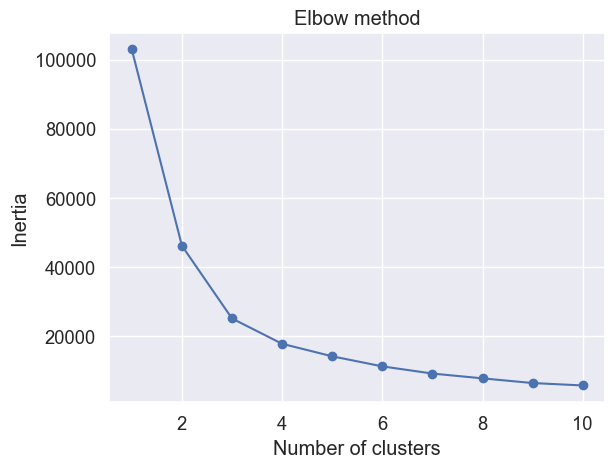

In [289]:
# COde to find our elbow for the k-means clustering method
from sklearn.cluster import KMeans

# Create data var
data = list(zip(x, y))
inertias = []

# Test cluster sizes 1-11
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
# Plot with k as x-var, inertia as y var
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


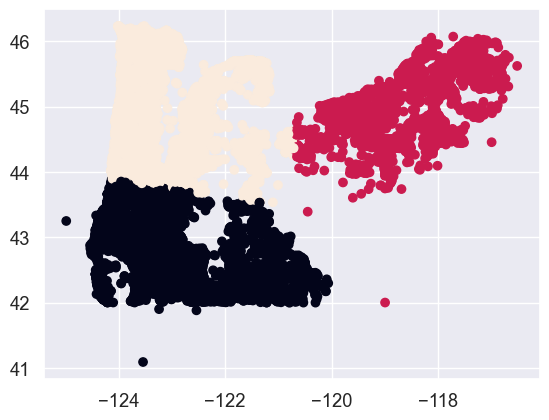

In [325]:
# Execute k-mean cluster and create graph
kmeans = KMeans(n_clusters=3, random_state=0) # this is the note we are taking about 
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [326]:
# import needed libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score


#Enumerate CaueBy Categorical Variable
df['CauseBy'] = df['CauseBy'].replace(['Ruralist-Paying', 'Recreationist', 'Lightning',
                                             'Other-Public', 'Motorist', 'Other-Landowner Related', 
                                             'Public Utility', 'Rancher-Farmer', 'Timber Harvest Worker', 
                                             'Other Forest Mgt. Worker', 'Ruralist-Non-Paying', 'Hunter', 
                                             'Transient','Hiker', 'Fisherman', 'Marijuana Grower'],
                                            [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

# Drop NA values
df['CauseBy'].dropna()


# Create dataframes for individual clusters
cluster1 = df[kmeans.labels_==0]
cluster2 = df[kmeans.labels_==1]
cluster3 = df[kmeans.labels_==2]

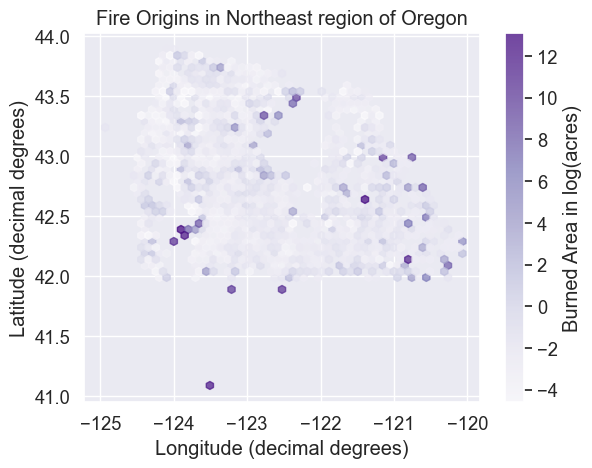

In [327]:
# Display acresburnt heatmap for cluster 1 (North-West Region of Oregon)
plt.hexbin(cluster1['Long_DD'], cluster1['Lat_DD'], C=cluster1['log(acres)'], gridsize=50, cmap='Purples', alpha=0.7)
plt.title('Fire Origins in Northeast region of Oregon')
plt.xlabel('Longitude (decimal degrees)')
plt.ylabel('Latitude (decimal degrees)')
cb = plt.colorbar()
cb.set_label('Burned Area in log(acres)')

In [328]:
# Split the data into training and test s ets.
c1_train = cluster1.loc[:2750].copy()
c1_test = cluster1.loc[2750:].copy()

<AxesSubplot:xlabel='Long_DD', ylabel='log(acres)'>

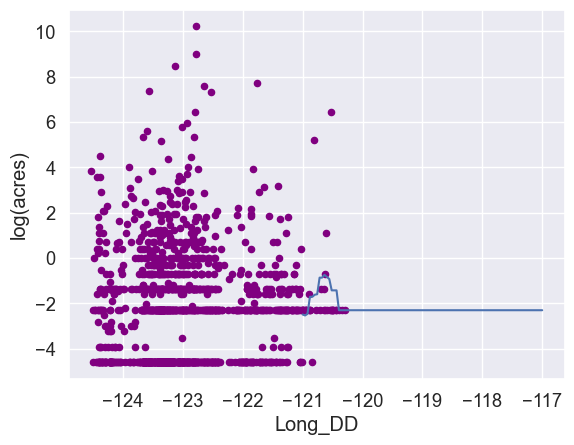

In [329]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

X_train = c1_train[["Long_DD"]]
y_train = c1_train["log(acres)"]
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["Long_DD"] = np.linspace(-121, -117, num=100)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Long_DD"]
)

# Plot the predictions.
colors = np.array(["Purple"])
c1_train.plot.scatter(x="Long_DD", y="log(acres)", c=colors[0])
y_new_.plot.line()


In [330]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# define pipeline and fit to training set
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=10)
)
pipeline.fit(X=X_train, y=y_train)

# extract features and label from validation set
X_val = c1_test[["Long_DD"]]
y_val = c1_test["log(acres)"]

# get model's predictions on validation set
y_val_ = pipeline.predict(X_val)

# calculate RMSE on validation set
rmse = np.sqrt(mean_squared_error(y_val, y_val_))
print("Longitude MSE: " + str(rmse))


Longitude MSE: 2.4671450892036955


<AxesSubplot:xlabel='Lat_DD', ylabel='log(acres)'>

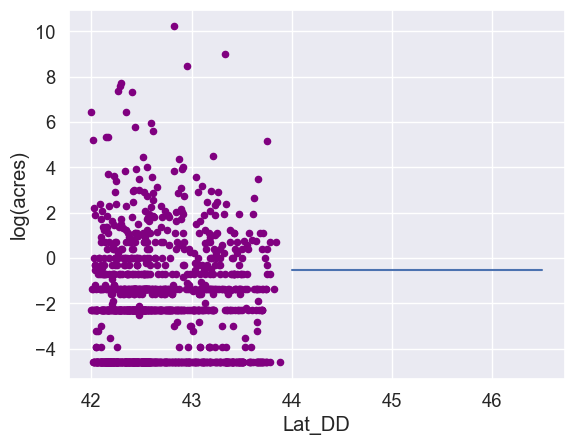

In [331]:
X_train = c1_train[["Lat_DD"]]
y_train = c1_train["log(acres)"]
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["Lat_DD"] = np.linspace(44, 46.5, num=100)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Lat_DD"]
)

# Plot the predictions.
c1_train.plot.scatter(x="Lat_DD", y="log(acres)", c=colors[0])
y_new_.plot.line()

In [332]:
# define pipeline and fit to training set
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=10)
)
pipeline.fit(X=X_train, y=y_train)

# extract features and label from validation set
X_val = c1_test[["Lat_DD"]]
y_val = c1_test["log(acres)"]

# get model's predictions on validation set
y_val_ = pipeline.predict(X_val)

# calculate RMSE on validation set
rmse = np.sqrt(mean_squared_error(y_val, y_val_))
print("Latitude MSE: " + str(rmse))

Latitude MSE: 2.4860560658794464


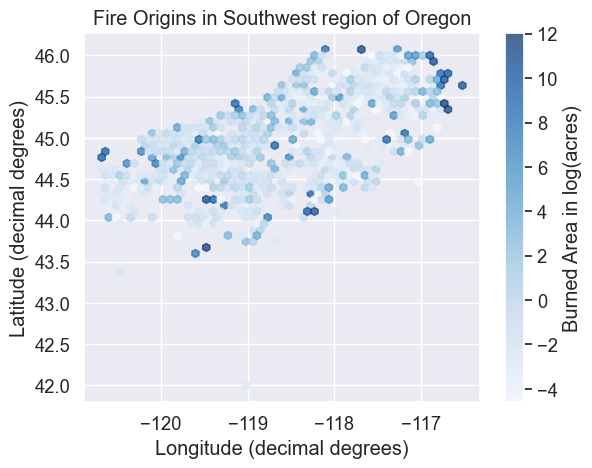

In [333]:
# Display acresburnt heatmap for cluster 1 (North-West Region of Oregon)
plt.hexbin(cluster2['Long_DD'], cluster2['Lat_DD'], C=cluster2['log(acres)'], gridsize=50, cmap='Blues', alpha=0.7)
plt.title('Fire Origins in Southwest region of Oregon')
plt.xlabel('Longitude (decimal degrees)')
plt.ylabel('Latitude (decimal degrees)')
cb = plt.colorbar()
cb.set_label('Burned Area in log(acres)')

In [334]:
# Split the data into training and test s ets.
c2_train = cluster2.loc[:4000].copy()
c2_test = cluster2.loc[4000:].copy()

<AxesSubplot:xlabel='Long_DD', ylabel='log(acres)'>

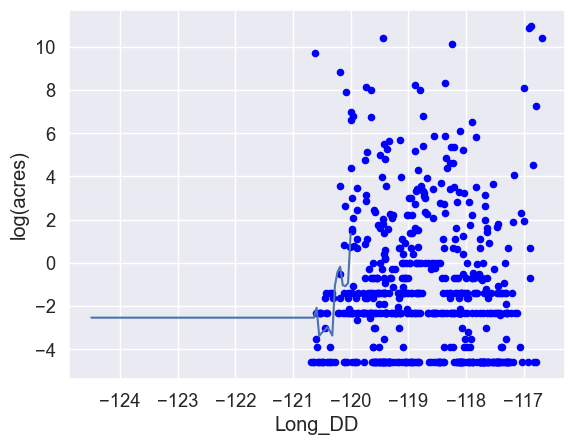

In [335]:
X_train = c2_train[["Long_DD"]]
y_train = c2_train["log(acres)"]
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["Long_DD"] = np.linspace(-124.5, -120, num=100)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Long_DD"]
)

# Plot the predictions.
colors = np.array(["Blue"])
c2_train.plot.scatter(x="Long_DD", y="log(acres)", c=colors[0])
y_new_.plot.line()

In [336]:
# define pipeline and fit to training set
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=10)
)
pipeline.fit(X=X_train, y=y_train)

# extract features and label from validation set
X_val = c2_test[["Long_DD"]]
y_val = c2_test["log(acres)"]

# get model's predictions on validation set
y_val_ = pipeline.predict(X_val)

# calculate RMSE on validation set
rmse = np.sqrt(mean_squared_error(y_val, y_val_))
print("Longitude MSE: " + str(rmse))

Longitude MSE: 3.247304844642405


<AxesSubplot:xlabel='Lat_DD', ylabel='log(acres)'>

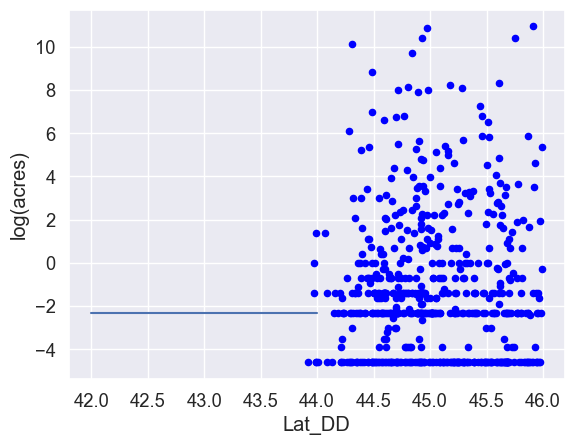

In [337]:
X_train = c2_train[["Lat_DD"]]
y_train = c2_train["log(acres)"]
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["Lat_DD"] = np.linspace(42, 44, num=100)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Lat_DD"]
)

# Plot the predictions.
colors = np.array(["Blue"])
c2_train.plot.scatter(x="Lat_DD", y="log(acres)", c=colors[0])
y_new_.plot.line()

In [338]:
# define pipeline and fit to training set
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=10)
)
pipeline.fit(X=X_train, y=y_train)

# extract features and label from validation set
X_val = c1_test[["Lat_DD"]]
y_val = c1_test["log(acres)"]

# get model's predictions on validation set
y_val_ = pipeline.predict(X_val)

# calculate RMSE on validation set
rmse = np.sqrt(mean_squared_error(y_val, y_val_))
print("Latitude MSE: " + str(rmse))

Latitude MSE: 2.3980715378236344


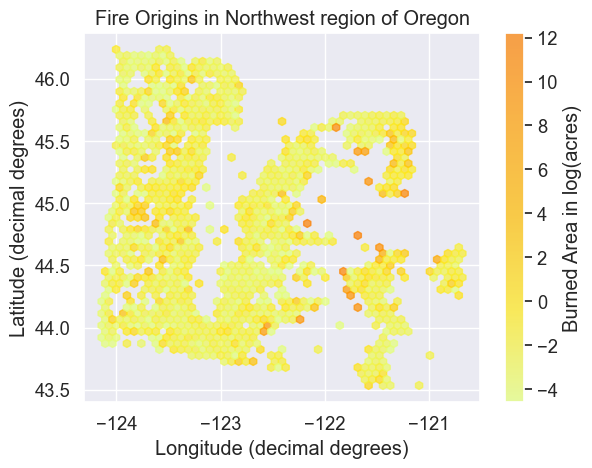

In [339]:
# Display acresburnt heatmap for cluster 1 (North-West Region of Oregon)
plt.hexbin(cluster3['Long_DD'], cluster3['Lat_DD'], C=cluster3['log(acres)'], gridsize=50, cmap='Wistia', alpha=0.7)
plt.title('Fire Origins in Northwest region of Oregon')
plt.xlabel('Longitude (decimal degrees)')
plt.ylabel('Latitude (decimal degrees)')
cb = plt.colorbar()
cb.set_label('Burned Area in log(acres)')

In [340]:
# Split the data into training and test s ets.
c3_train = cluster3.loc[:2750].copy()
c3_test = cluster3.loc[2750:].copy()

<AxesSubplot:xlabel='Long_DD', ylabel='log(acres)'>

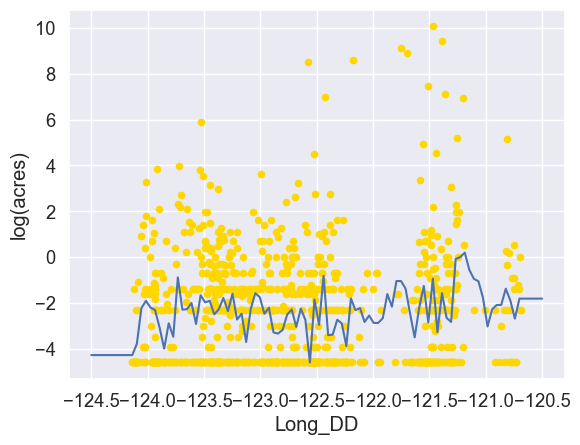

In [341]:
X_train = c3_train[["Long_DD"]]
y_train = c3_train["log(acres)"]
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["Long_DD"] = np.linspace(-124.5, -120.5, num=100)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Long_DD"]
)

# Plot the predictions.
colors = np.array(["Gold"])
c3_train.plot.scatter(x="Long_DD", y="log(acres)", c=colors[0])
y_new_.plot.line()

In [342]:
# define pipeline and fit to training set
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=10)
)
pipeline.fit(X=X_train, y=y_train)

# extract features and label from validation set
X_val = c3_test[["Long_DD"]]
y_val = c3_test["log(acres)"]

# get model's predictions on validation set
y_val_ = pipeline.predict(X_val)

# calculate RMSE on validation set
rmse = np.sqrt(mean_squared_error(y_val, y_val_))
print("Longitude MSE: " + str(rmse))

Longitude MSE: 2.4781173023322394


<AxesSubplot:xlabel='Lat_DD', ylabel='log(acres)'>

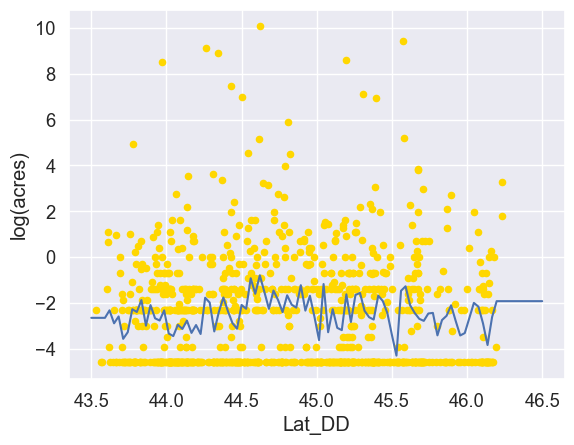

In [343]:
X_train = c3_train[["Lat_DD"]]
y_train = c3_train["log(acres)"]
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["Lat_DD"] = np.linspace(43.5, 46.5, num=100)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Lat_DD"]
)

# Plot the predictions.
colors = np.array(["Gold"])
c3_train.plot.scatter(x="Lat_DD", y="log(acres)", c=colors[0])
y_new_.plot.line()

In [344]:
# define pipeline and fit to training set
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=10)
)
pipeline.fit(X=X_train, y=y_train)

# extract features and label from validation set
X_val = c3_test[["Lat_DD"]]
y_val = c3_test["log(acres)"]

# get model's predictions on validation set
y_val_ = pipeline.predict(X_val)

# calculate RMSE on validation set
rmse = np.sqrt(mean_squared_error(y_val, y_val_))
print("Latitude MSE: " + str(rmse))

Latitude MSE: 2.5259028623674915
